# **INSTRUCTIONS**

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:

    1. Data from our lives
    2. Variable selection

Follow the prompts in the attached jupyter notebook. 

**We are using the same data as for the previous homework**. Use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a variable selection/feature reduction would be appropriate.

*Your Answer:*

<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;">

1. Lets consider a situation where we need to **plan a Healthy diet**. There are variety of foods, each with different nutritional components such as calories, proteins, fats, vitamins, and minerals. The **aim of the diet is to meet nutritional needs without considering too many choices**.
Variable selection or feature reduction, in this context, would help to **identify crucial nutritional components** and focus on selecting foods that contribute positively to your health goals. For example, prioritizing foods rich in nutrients such as fruits and vegetables, lean proteins, whole grains, and healthy fats.

2. Another example can be a survey that was conducted by a teacher to improve **quality of classes** taught. This might be dependent upon factors like **syllabus, class timings, practice/Assignments**, method of teaching(online/in-person) etc. All these factors affect the quality of classes, but **syllabus and Assignments given in class would be of more priority** than class timings to estimate quality of teaching.
</div>

# 2. Variable selection

In our class so far we covered three types of feature selection techniques. They were: 
1. Filter methods
2. Wrapper methods
3. Embedded methods

Use the dataset 'auto_imports1.csv' from our previous homework. More specifically, use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns

# 2.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findigs

<div style="background-color:  #1e228f; padding: 10px; border-radius: 5px;">
    <h2 style="color:#ffffff;">Univariate selection</h2>
    <p style="font-style: italic;">SelectKBest</p>
</div>

<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;"> Here Univariate selection is done using Select K Best method. In this case, the model is fed the independent variables and target variable through the dataset and we get output as a dataset with reduced dimensionality based on the number of features required..
</div>


In [120]:
# importing libraries
from sklearn.feature_selection import SelectKBest, f_regression, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv('df3.csv') # importing previously cleaned dataset which is df3 in this case

In [121]:
df.head()

,Unnamed: 0,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27,13495.0,1
1,1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27,16500.0,1
2,2,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26,16500.0,1
3,3,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30,13950.0,1
4,4,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22,17450.0,1


In [122]:
df.shape

(195, 16)

In [123]:
# Split df into x and Y
target_col = "price"
X = df.loc[:, df.columns != target_col] # selecting all independent features/variables
y = df.loc[:, target_col] # selecting the target variable. Here it is price column

In [124]:
X.shape

(195, 15)

In [125]:
y.shape

(195,)

In [126]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [127]:
X_train.head()

,Unnamed: 0,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,fuel_type_gas
38,38,96.5,175.4,65.2,54.1,2304.0,110.0,3.15,3.58,9.00,86.0,5800.0,27.0,33,1
31,31,93.7,150.0,64.0,52.6,1837.0,79.0,2.91,3.07,10.10,60.0,5500.0,38.0,42,1
173,173,97.3,171.7,65.5,55.7,2209.0,109.0,3.19,3.40,9.00,85.0,5250.0,27.0,34,1
12,12,101.2,176.8,64.8,54.3,2765.0,164.0,3.31,3.19,9.00,121.0,4250.0,21.0,28,1
109,109,107.9,186.7,68.4,56.7,3252.0,152.0,3.70,3.52,10.75,95.0,4150.0,28.0,33,0


<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;">

- Since the independent and target variabel are continous values, the f_regression scoring criteria is used for the SelectK Best. Here, the SelectK best is applied to X_train and y_train data with the best k features and stored in a new variable X_new. 
</div>

In [128]:
X_new = SelectKBest(f_regression, k=5).fit_transform(X_train, y_train) 

<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;">

- We can compare the below output of the selectK best to the X_train data shown above. The X_train data has all the original columns.
- The X_new data has only 5 columns/features that the SelectK best function has choosen as most significant. If we look closer we can see that the columns selected are width,curb_weight,engine_size,horse_power and highway_mpg.
</div>

In [129]:
X_new[0:5] # checking first 5 rows

array([[  65.2, 2304. ,  110. ,   86. ,   33. ],
       [  64. , 1837. ,   79. ,   60. ,   42. ],
       [  65.5, 2209. ,  109. ,   85. ,   34. ],
       [  64.8, 2765. ,  164. ,  121. ,   28. ],
       [  68.4, 3252. ,  152. ,   95. ,   33. ]])

In [130]:
model = LinearRegression()
model.fit(X_new, y_train) #training new K best features data with target variable.
print(model.coef_) # printing coefficients for new data with k best features

[464.57715223   3.75221554  77.2118558   47.52831261  86.79977083]


<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;">
     
- According to the coefficients above, we observe that the width column has the greates coefficient value. This means that the any change in width will directly affect the price of the vehicle(car).
</div>

# 2.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findigs.

<div style="background-color:  #1e228f; padding: 10px; border-radius: 5px;">
    <h2 style="color#0002053;">Recursive Feature Elimination </h2>
  <p style="font-style: italic;">RFE</p> 
</div>
<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- Here Recursive Feature Elimination (RFE) is done using RandomForestRegressor as an estimator for the function. In this case, the model is fed the independent variables and target variable.
  </div>aria

In [131]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [132]:
# Initialize a linear regression model 
estimator1 = RandomForestRegressor()

# Initialize RFE with the estimator and the number of features to select
rfe = RFE(estimator1, n_features_to_select=6)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=6)

<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- The output of the 5 features chosen depends on the estimator being used. Here the estimator for LinearRegression and RandomForestRegressor has been used. Both estimators come up with different features, but the rank of these features are not very different.
</div>

<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- Below the columns have been ranked based on importance of feature to predict target by the RFE function and respective columns have been marked as selected. The lesser the rank of the feature, the more it affects the prediction of target variable.
</div>


In [133]:
#printing columns and their respective ranks based on RFE output ranks:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} | selected={rfe.support_[i]} | rank={rfe.ranking_[i]}")

Unnamed: 0 | selected=True | rank=1
wheel_base | selected=False | rank=3
length | selected=False | rank=2
width | selected=True | rank=1
heights | selected=False | rank=5
curb_weight | selected=True | rank=1
engine_size | selected=True | rank=1
bore | selected=False | rank=7
stroke | selected=False | rank=6
comprassion | selected=False | rank=9
horse_power | selected=False | rank=4
peak_rpm | selected=False | rank=8
city_mpg | selected=True | rank=1
highway_mpg | selected=True | rank=1
fuel_type_gas | selected=False | rank=10


<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

-  From the above output we can say RFE has selected curb_weight,Unnamed(dummy column), engine_size ,city_mpg and highway_mpg as important features.
- Next the coefficients of the selected features are calculated as follows.
</div>


In [134]:
# Split the data into training and testing sets for estimator 1
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_model = LinearRegression()

# Get the selected features
selected_features_indices = rfe.support_
# Get the names of the selected features
selected_features = X_train.columns[selected_features_indices]
# Display the selected features
print("Selected Features for estimator 1:")
print(selected_features)
# Fit the linear regression model using the selected features
reg_model.fit(X_train[selected_features], y_train)

# Get the coefficients of the linear regression model
coefficients = reg_model.coef_

# Display the coefficients
print("\nCoefficients:")
print(coefficients)

Selected Features for estimator 1:
Index(['Unnamed: 0', 'width', 'curb_weight', 'engine_size', 'city_mpg',
       'highway_mpg'],
      dtype='object')

Coefficients:
[  -9.86495633  358.23023059    4.38033356   97.47691564 -233.44337596
  189.5569851 ]


In [135]:
# Initialize a linear regression model 
estimator2 = LinearRegression()

# Initialize RFE with the estimator and the number of features to select 
rfe = RFE(estimator2, n_features_to_select=5)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [136]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} | selected={rfe.support_[i]} | rank={rfe.ranking_[i]}")

Unnamed: 0 | selected=False | rank=9
wheel_base | selected=False | rank=6
length | selected=False | rank=8
width | selected=False | rank=2
heights | selected=False | rank=4
curb_weight | selected=False | rank=10
engine_size | selected=False | rank=5
bore | selected=True | rank=1
stroke | selected=True | rank=1
comprassion | selected=True | rank=1
horse_power | selected=False | rank=7
peak_rpm | selected=False | rank=11
city_mpg | selected=True | rank=1
highway_mpg | selected=False | rank=3
fuel_type_gas | selected=True | rank=1


<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- From the above output we can say RFE for estimator 2 has selected bore ,stroke, engine_size ,city_mpg and fuel_type_gas as important features. 
- For RFE estimator 1, it has selected curb_weight, engine_size, city_mpg and highway_mpg as important features.
- Next the coefficients of the selected features are calculated as follows.
</div>

In [137]:
# Split the data into training and testing sets for estimator 2
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_model = LinearRegression()

# Get the selected features
selected_features_indices = rfe.support_
# Get the names of the selected features
selected_features = X_train.columns[selected_features_indices]
# Display the selected features
print("Selected Features for estimator 1:")
print(selected_features)
# Fit the linear regression model using the selected features
reg_model.fit(X_train[selected_features], y_train)

# Get the coefficients of the linear regression model
coefficients = reg_model.coef_

# Display the coefficients
print("\nCoefficients:")
print(coefficients)

Selected Features for estimator 1:
Index(['bore', 'stroke', 'comprassion', 'city_mpg', 'fuel_type_gas'], dtype='object')

Coefficients:
[  991.62391168  -286.29963797  2127.31448921  -967.18585946
 -5410.35928977]


<div style="background-color: #1e228f; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- From above coefficients we can say that **stroke,city mpg and fuel_type gas are negetively** related to target and **bore, comprassion are positively** related to target variable.
</div>


# 2.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection. Report your findigs.

<div style="background-color: #a43cfa; padding: 10px; border-radius: 5px;">
    <h2 style="color:#ffff ;">For this method, Elastic net is used to select the features.</h2>
    <p style="font-style: italic;"></p>
</div>

In [138]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [139]:
regression=LinearRegression()
regression.fit(X_train,y_train)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) # printing mean squared error

5531474.429257315


In [140]:
#printing coeffiecients before using Elastic net.
coef_dict_baseline = {}
for coef,feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Unnamed: 0': -15.337702475071573,
 'wheel_base': 118.55322194535603,
 'length': -34.991286711251945,
 'width': 334.8612378372121,
 'heights': 261.2636964085698,
 'curb_weight': 1.5346938585702006,
 'engine_size': 81.78442593565643,
 'bore': -1091.1908349918617,
 'stroke': -4037.8230097090122,
 'comprassion': 692.8213750580696,
 'horse_power': 64.45658982317504,
 'peak_rpm': 1.111143566457912,
 'city_mpg': -370.2396548693428,
 'highway_mpg': 282.0858205156288,
 'fuel_type_gas': -3756.5861087900585}

<div style="background-color:#8e11f5; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- Using Elastic Net below
</div>

In [141]:
elastic=ElasticNet(alpha=1,l1_ratio=0.5)
elastic.fit(X_train,y_train)
second_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(second_model)

5531474.429257315


In [142]:
coef_dict_baseline = {}
for coef,feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'Unnamed: 0': -13.594368859519175,
 'wheel_base': 33.54774061194207,
 'length': -8.423670453743764,
 'width': 245.04567803197884,
 'heights': 214.6351949588654,
 'curb_weight': 3.8580219077955813,
 'engine_size': 69.452622406311,
 'bore': -8.93270459818549,
 'stroke': -324.001287970343,
 'comprassion': 567.0815275871863,
 'horse_power': 59.88402894550887,
 'peak_rpm': 0.5276860563503538,
 'city_mpg': -94.51182521968862,
 'highway_mpg': 148.35450462467244,
 'fuel_type_gas': -186.42724234534137}

<div style="background-color:#8e11f5; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- If we compare the coefficients before and after Elastic net above, we can see value of wheel base,width,heights,engine szie,comprassion,horse power,peak rpm, highway mpg have decreased little comparitively, but are positive. So we can say these features are good enough. But we need best
- So  we see the coefficients width, curb weight, engine size, comprassion, Horse power and highway mileage are the best features.
- Features such asbore,city mpg and stroke do not contribute to the prediction or have a negative influence on prediction.
- length and peak rpm have coefficients close to zero, which means that they dont contribute much to the prediction and hence can be removed.
</div>

# 2.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.

<div style="background-color:#8e11f5; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- For comparison, the features that were selceted by each variable selection method can be analyzed:
- Filter method(SelectK best) : width,curb_weight,engine_size,horse_power and highway_mpg
- Wrapper method(Recursive feature elimination RFE):[EST1-curb_weight, engine_size, city_mpg and highway_mpg]  [EST2- bore ,stroke, engine_size ,city_mpg and fuel_type_gas]
- Embedded method( Elastic net):  width, curb weight, engine size, comprassion, Horse power and highway mileage
</div>

<div style="background-color:#8e11f5; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- By comparing, the SelectK best, RFE with estimator 1 and Elastic net methods considers **Curb weight,Engine size and highway mileage to be an important aspect** for prediction of cost of the vehicle(car) hence we can conclude these to be most important features among all others.
- While in the previous assignment, the outcome of OLS method, it was concluded that **length and highway mileage was found to be less significant**. Even in this case, these featuresdo not have much significance except for highway mileage which was selected by filter and embedded method.
- So we can conclude, that the results from previous method of variable selection and Filter/Wrapper/Embedded methods provide similar output regarding significant features.
</div>

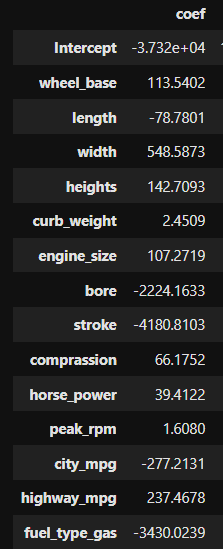
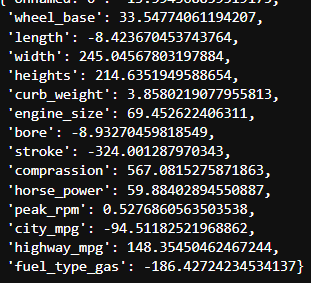

<div style="background-color:#8e11f5; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- When we compare the coefficients of model 1 from previous assignment to the current ones, we can spot that the **value of coefficients have decreased** and this makes it easier for getting insights and analyzing the feature's importance.
</div>

# 2.5 Bonus question (*extra 5 points*)

Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.

In [143]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler() # standardizing the values to carry out PCA
X_scaled= scaler.fit_transform(X)
X_scaled

array([[-1.72319115, -1.71550492, -0.43850391, ..., -0.69003306,
        -0.56789569,  0.3380617 ],
       [-1.7054263 , -1.71550492, -0.43850391, ..., -0.69003306,
        -0.56789569,  0.3380617 ],
       [-1.68766144, -0.72789532, -0.24564626, ..., -1.00719617,
        -0.71714051,  0.3380617 ],
       ...,
       [ 1.68766144,  1.71601997,  1.16864321, ..., -1.16577772,
        -1.16487499,  0.3380617 ],
       [ 1.7054263 ,  1.71601997,  1.16864321, ...,  0.1028747 ,
        -0.56789569, -2.95803989],
       [ 1.72319115,  1.71601997,  1.16864321, ..., -1.00719617,
        -0.86638534,  0.3380617 ]])

In [145]:
X2_train,X2_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=30)

In [146]:
model=RandomForestRegressor()
model.fit(X2_train,y_train)
model.score(X2_test,y_test) # model accuracy

0.9335045029483908

In [147]:
pca = PCA(0.95)# retain 95% of useful features.
X_pca=pca.fit_transform(X)
X_pca.shape

(195, 2)

In [148]:
X_pca

array([[ 4.42860455e+01, -8.65206307e+01],
       [ 4.42983526e+01, -8.65368916e+01],
       [ 2.76227516e+02,  6.65649862e+01],
       [-4.06963357e+02,  2.14935174e+02],
       [ 8.65721247e-01,  4.82262816e+02],
       [-2.63582638e+02,  3.09067960e+02],
       [ 1.77149148e+01,  4.93025905e+02],
       [ 1.09430119e+02,  5.52999421e+02],
       [ 2.20347574e+02,  6.26485204e+02],
       [-5.23162944e+02,  4.97032966e+02],
       [-5.23150637e+02,  4.97016705e+02],
       [ 5.93096444e+02, -6.23112934e+02],
       [ 6.38960199e+02, -5.93134306e+02],
       [ 8.81007514e+02, -4.34820515e+02],
       [ 4.00367293e+02,  6.26240081e+02],
       [ 5.25514443e+02,  7.08080372e+02],
       [ 6.29877860e+02,  7.76320516e+02],
       [-9.00327732e+02, -5.87831537e+02],
       [-7.40530961e+02, -1.24216318e+02],
       [-7.11288772e+02, -1.05114691e+02],
       [-7.93726492e+02, -3.96820671e+01],
       [-7.93653739e+02, -3.96150027e+01],
       [-5.81889805e+02,  1.00048368e+02],
       [-7.

In [149]:
#training new dataframe X_pca
X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_pca,y,test_size=0.3, random_state=30)

In [150]:
model=RandomForestRegressor()
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.7898840604068227

<div style="background-color:#8e11f5; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- Here, we see that after using PCA, the model accuracy drops a little. This may be  due to reduction in dimentionality which results in loss of information for prediction.
</div>

In [151]:
n_components=5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [152]:
loadings_df = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(n_components)])
print(loadings_df)

     Unnamed: 0  wheel_base    length     width   heights  curb_weight  \
PC1    0.032572    0.303075  0.345815  0.336542  0.124280     0.365271   
PC2    0.181461    0.234629  0.134965  0.109184  0.315943     0.060373   
PC3    0.547372    0.026341  0.058436 -0.096742  0.297714    -0.067925   
PC4    0.225132   -0.323636 -0.166294 -0.057581 -0.608168     0.055460   
PC5   -0.236959    0.003518  0.067628  0.113929  0.049182     0.071636   

     engine_size      bore    stroke  comprassion  horse_power  peak_rpm  \
PC1     0.335233  0.275149  0.061377    -0.076761     0.313309 -0.088069   
PC2    -0.046763  0.010853  0.087463     0.453352    -0.241303 -0.371677   
PC3    -0.185617  0.255781 -0.646905    -0.063809    -0.080146 -0.022977   
PC4     0.275644  0.335137 -0.185327     0.287371     0.207160 -0.229079   
PC5     0.047460 -0.138529 -0.399685     0.548553     0.106095  0.637320   

     city_mpg  highway_mpg  fuel_type_gas  
PC1 -0.326858    -0.336949      -0.036478  
PC2  0.256

In [153]:
columns_pca = [f"PC{i+1}" for i in range(n_components)] # PCA components
X_pca_df = pd.DataFrame(X_pca, columns=columns_pca)
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.726964,-2.190071,0.037883,2.151834,0.796116
1,-0.726385,-2.186848,0.047607,2.155833,0.791906
2,0.369235,-1.562028,-2.349108,-0.208734,0.423281
3,-0.363733,-0.181738,-1.197188,-0.956040,1.382175
4,1.263288,-1.823985,-1.180370,-1.339261,0.296372


In [154]:
pca.explained_variance_ratio_ # variance ratio

array([0.46243329, 0.18690144, 0.09354567, 0.06599678, 0.04994513])

<div style="background-color:#8e11f5; padding: 15px; border: 1px solid #000205; border-radius: 5px;">  

- Explained Variance Ratio tells about how much information can be attributed towards each component. 
- Here, it seen that The first Principal component contains alsmot 50% of the variance. The first 3 principal components represent alsmost 80% of the variance.
</div>

<style>
    table {
        width: 60%;
        border-collapse: collapse;
        margin-bottom: 20px;
    }
    th, td {
        border: 1px solid #ddd;
        padding: 8px;
        text-align: left;
    }
    th {
        background-color:#fafafa;
    }
</style>

| NAME | ID | COURSE |
| -------- | -------- | -------- |
| **Chriag Hebbal Rudresh**  | **1002160960**  | **DASC-5301-Data Science**  |
